### Machine Learning Capstone Project: Predict the Wine quality

In [1]:
#Step -1 Importing the libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Step 2 reading the dataset
Wine_Quality = pd.read_csv('datasets\QualityPrediction.csv')
pd.set_option('display.max_columns',20)
Wine_Quality.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
Wine_Quality.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
Wine_Quality['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

#### Analysis:
1. Quality of wine is the Target variable and tells about the rating of wine (1-10).
2. Quality of Wine depends on the rest of the variables hence "Quality" is the output variable (y)




In [5]:
Wine_Quality.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'] 

Wine_Quality.shape

(1599, 12)

In [7]:
Quality = Wine_Quality.copy()


In [8]:
corr = Wine_Quality.corr() # alcohol has correlation, volatile acidity negative correlation

corr["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

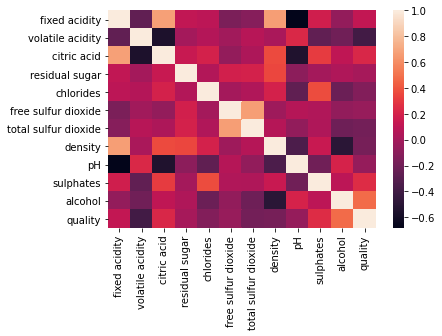

In [9]:
sns.heatmap(Wine_Quality.corr())
plt.show()

In [10]:
Quality.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


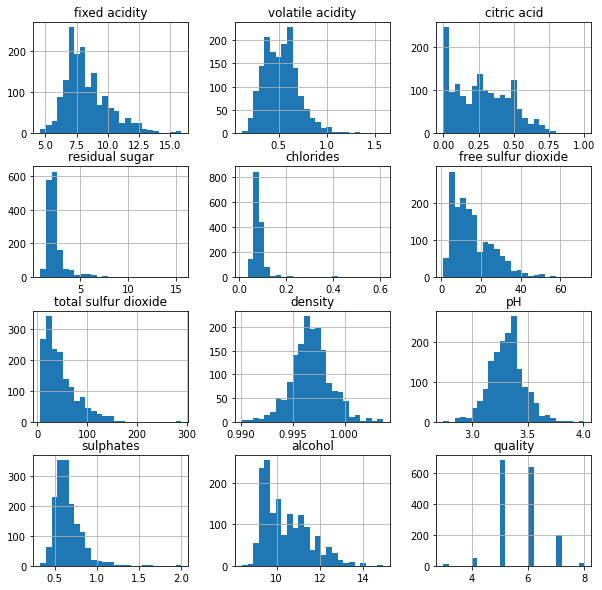

In [11]:
Quality.hist(bins=25,figsize=(10,10)) #Inference: Alcohol has relation with quality
# display histogram
plt.show()

In [12]:
#Assigning independent and dependent variables:

Quality['best quality']=[1 if x>=7 else 0 for x in Quality['quality']]
feature_space = Quality.drop(['quality','best quality'],axis=1)
feature_class = Quality.iloc[:, Quality.columns == 'best quality']

In [13]:
Std_scaler = StandardScaler()
x = Std_scaler.fit_transform(feature_space)


In [14]:
train_x, test_x, class_train_set, class_test_set = train_test_split(x,
                                                                    feature_class,
                                                                    test_size = 0.30, 
                                                                    random_state = 42)

test_x = Std_scaler.transform(test_x)

In [15]:
fit_rf = RandomForestClassifier(random_state=42)

In [16]:
np.random.seed(42)

# Providing the different values of hyperparameters
param_dist = {'max_depth': [2, 3, 4],
              'max_features': ['auto', 'sqrt', 'log2', None],
                'bootstrap' : [True, False],
              'criterion': ['gini', 'entropy']}

# gridsearchCV 
cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 1)

#Fitting the train set , so that grid search is executed on this dataset
cv_rf.fit(train_x, class_train_set)

#Printing the best parameters by using best_params
print('Best Parameters using grid search: \n', cv_rf.best_params_)

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'max_features': None}


In [17]:
#Finally the best parameters are specified

fit_rf.set_params(criterion = 'entropy',
                  max_features = 'log2', 
                  bootstrap = True,
                  max_depth = 4)


RandomForestClassifier(criterion='entropy', max_depth=4, max_features='log2',
                       random_state=42)

In [18]:
# The OOB rate
fit_rf.set_params(oob_score=True)

min_estimators = 15
max_estimators = 250

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    fit_rf.set_params(n_estimators=i)       #specifying the number of decision trees
    fit_rf.fit(train_x, class_train_set)     #fit to the train dataset

    oob_error = 1 - fit_rf.oob_score_      #oob_score_ gives prediction score, subtract from 1 to find error
    error_rate[i] = oob_error
    


In [19]:
error_rate

{15: 0.11885612153708669,
 16: 0.11796246648793562,
 17: 0.11885612153708669,
 18: 0.11706881143878467,
 19: 0.1161751563896336,
 20: 0.11706881143878467,
 21: 0.11528150134048254,
 22: 0.11349419124218052,
 23: 0.11528150134048254,
 24: 0.11528150134048254,
 25: 0.11528150134048254,
 26: 0.11438784629133159,
 27: 0.11706881143878467,
 28: 0.11885612153708669,
 29: 0.1161751563896336,
 30: 0.1161751563896336,
 31: 0.11349419124218052,
 32: 0.11528150134048254,
 33: 0.11260053619302945,
 34: 0.11081322609472744,
 35: 0.1117068811438785,
 36: 0.11349419124218052,
 37: 0.11081322609472744,
 38: 0.11081322609472744,
 39: 0.1117068811438785,
 40: 0.11260053619302945,
 41: 0.11438784629133159,
 42: 0.11438784629133159,
 43: 0.11349419124218052,
 44: 0.11349419124218052,
 45: 0.11260053619302945,
 46: 0.1117068811438785,
 47: 0.11260053619302945,
 48: 0.11260053619302945,
 49: 0.11260053619302945,
 50: 0.11349419124218052,
 51: 0.11438784629133159,
 52: 0.11438784629133159,
 53: 0.11438784629

In [20]:
# Convert dictionary to a pandas series for easy plotting 
oob_series = pd.Series(error_rate)
oob_series

15     0.118856
16     0.117962
17     0.118856
18     0.117069
19     0.116175
         ...   
246    0.103664
247    0.103664
248    0.104558
249    0.104558
250    0.104558
Length: 236, dtype: float64

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes (From 15 to 250 trees)')

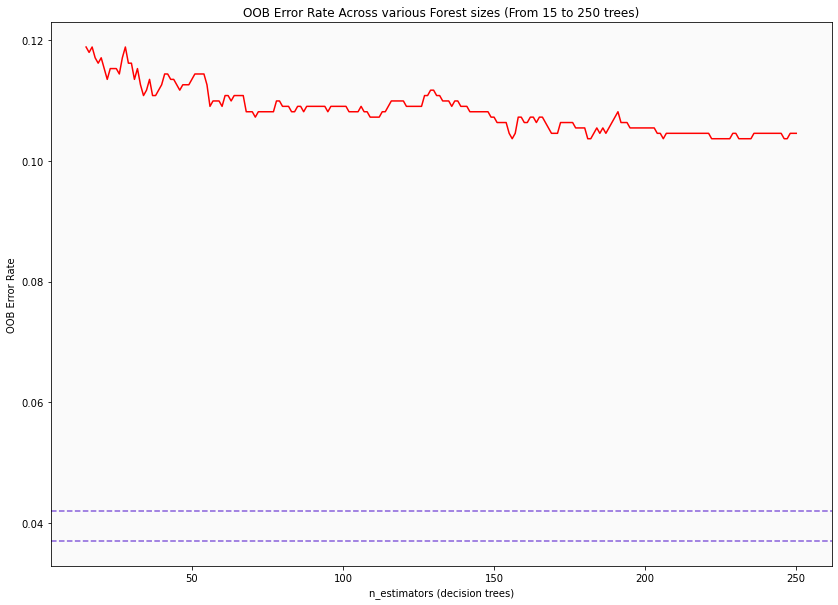

In [21]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.axhline(0.042, color='#875FDB',linestyle='--')
plt.axhline(0.037, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators (decision trees)')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes (From 15 to 250 trees)')

In [22]:
print('OOB Error rate for 200 trees is: {0:.5f}'.format(oob_series[250]))

OOB Error rate for 200 trees is: 0.10456


In [23]:
# Refine the tree via OOB Output
fit_rf.set_params(n_estimators=250,
                  bootstrap = True,
                  oob_score=False)

RandomForestClassifier(criterion='entropy', max_depth=4, max_features='log2',
                       n_estimators=250, random_state=42)

In [24]:
fit_rf.fit(train_x, class_train_set)

RandomForestClassifier(criterion='entropy', max_depth=4, max_features='log2',
                       n_estimators=250, random_state=42)

In [25]:
predictions_rf = fit_rf.predict(test_x)

In [26]:
confusion_matrix(class_test_set,predictions_rf)

array([[413,   0],
       [ 67,   0]], dtype=int64)

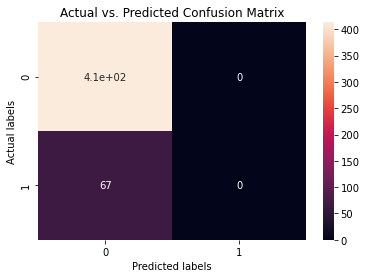

In [27]:
cm=confusion_matrix(class_test_set,predictions_rf)
ax= plt.subplot()
sns.heatmap(cm,annot=True, ax= ax)

ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels'); 
ax.set_title('Actual vs. Predicted Confusion Matrix'); 


plt.show()

In [35]:
from sklearn.metrics import accuracy_score
accuracy_rf = accuracy_score(class_test_set,predictions_rf)
accuracy_rf

0.8604166666666667

In [29]:
predictions_prob = fit_rf.predict_proba(test_x)[:, 1]

fpr, tpr, _ = metrics.roc_curve(class_test_set,
                          predictions_prob,
                          pos_label = 1)

In [30]:
auc_rf = auc(fpr, tpr)
auc_rf

0.7411730692783058

In [31]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(fit_rf, train_x, class_train_set, cv=5)
scores.mean() 

0.8927690582959642

In [32]:
x_predict = list(fit_rf.predict(test_x))
print(classification_report(x_predict,class_test_set))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92       480
           1       0.00      0.00      0.00         0

    accuracy                           0.86       480
   macro avg       0.50      0.43      0.46       480
weighted avg       1.00      0.86      0.92       480



## Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_x,class_train_set)
prediction = lr.predict(test_x)
accuracy_score(class_test_set,prediction)

0.27708333333333335

## DecisionTree Classifier

In [34]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(train_x,class_train_set)
accuracy_score(class_test_set,dt.predict(test_x))

0.4666666666666667